In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [5]:
df.shape

(100, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [8]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [9]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

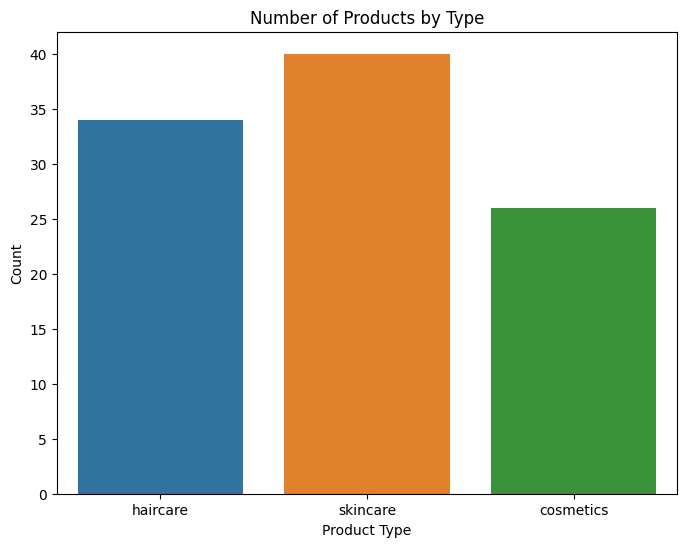

In [12]:
# create a bar chart of product types
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Product type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Number of Products by Type')
plt.show()


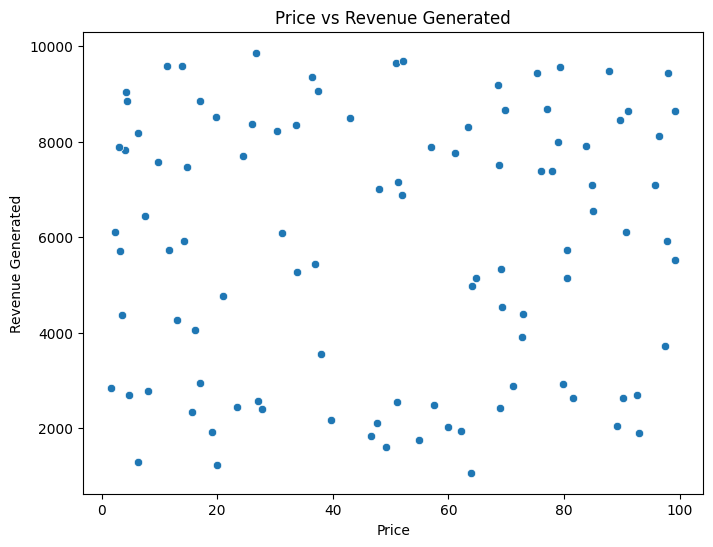

In [17]:
# create a scatter plot of price vs revenue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price', y='Revenue generated')
plt.xlabel('Price')
plt.ylabel('Revenue Generated')
plt.title('Price vs Revenue Generated')
plt.show()


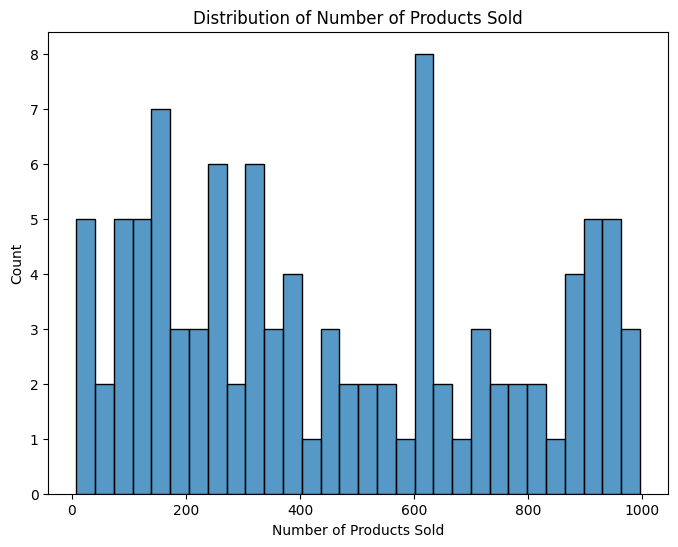

In [20]:
# create a histogram of number of products sold
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Number of products sold', bins=30)
plt.xlabel('Number of Products Sold')
plt.ylabel('Count')
plt.title('Distribution of Number of Products Sold')
plt.show()


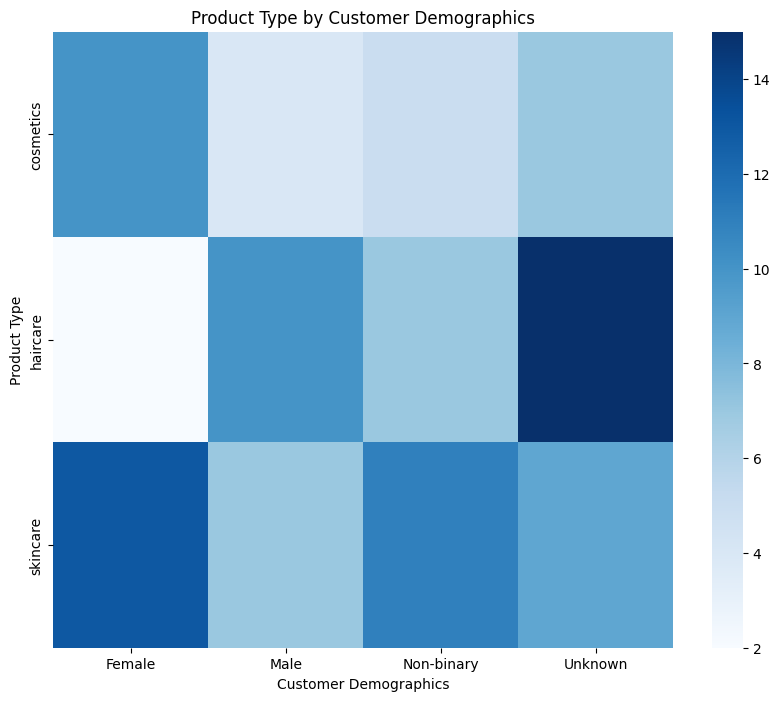

In [21]:
# create a heatmap of customer demographics
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['Product type'], df['Customer demographics']), cmap='Blues')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.title('Product Type by Customer Demographics')
plt.show()


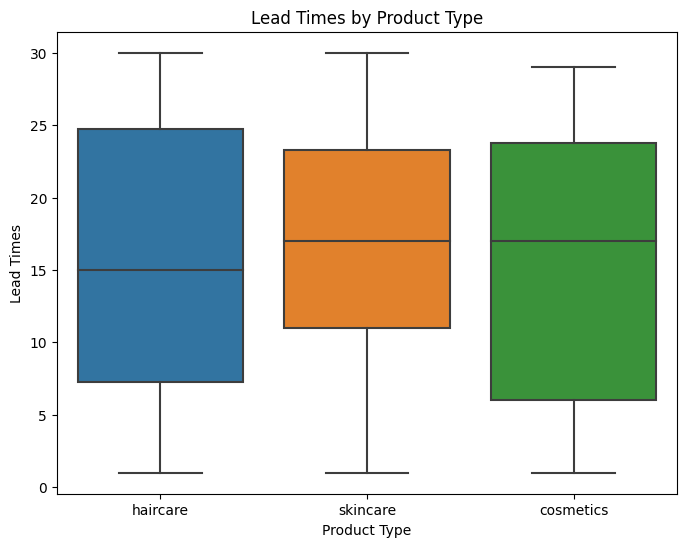

In [22]:
# create a box plot of lead times
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Product type', y='Lead times')
plt.xlabel('Product Type')
plt.ylabel('Lead Times')
plt.title('Lead Times by Product Type')
plt.show()


In [ ]:
# create a stacked bar chart of shipping carriers and transportation modes
plt.figure(figsize=(10,8))
pd.crosstab(df['Product type'], [df['Shipping carriers'], df['Transportation modes']]).plot(kind='bar', stacked=True)
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.title('Shipping Carriers and Transportation Modes by Product Type')
plt.show()


In [ ]:
# create a scatter plot of production volumes vs manufacturing costs
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Production volumes', y='Manufacturing costs')
plt.xlabel('Production Volumes')
plt.ylabel('Manufacturing Costs')
plt.title('Production Volumes vs Manufacturing Costs')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
top_suppliers = df.groupby('Supplier name')['Revenue generated'].sum().nlargest(10)
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, palette='Blues_d')
plt.xlabel('Revenue generated')
plt.ylabel('Supplier name')
plt.title('Top 10 suppliers by revenue')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Price', kde=True, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of product prices')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Product type', y='Price')
plt.xlabel('Product type')
plt.ylabel('Price')
plt.title('Box plot of product prices by product type')
plt.show()


In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Number of products sold', y='Revenue generated')
plt.xlabel('Number of products sold')
plt.ylabel('Revenue generated')
plt.title('Scatter plot of revenue generated vs. number of products sold')
plt.show()


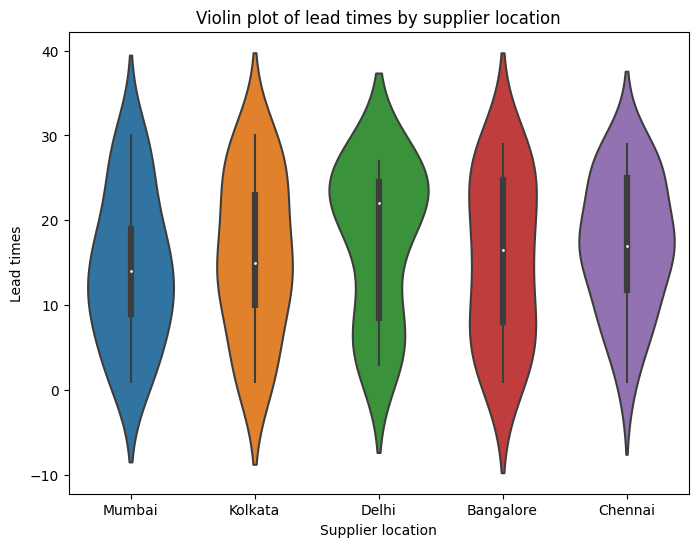

In [24]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='Location', y='Lead times')
plt.xlabel('Supplier location')
plt.ylabel('Lead times')
plt.title('Violin plot of lead times by supplier location')
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap of the correlation between variables')
plt.show()


Text(0.5, 1.0, 'Top 10 Products by Revenue')

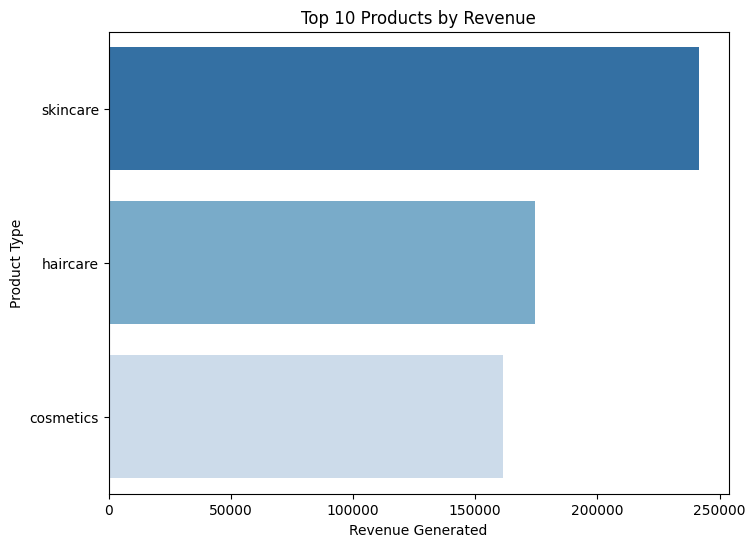

In [23]:
# group the data by product type and calculate the total revenue generated by each product
product_revenue = df.groupby('Product type')['Revenue generated'].sum()

# sort the products by revenue in descending order
product_revenue = product_revenue.sort_values(ascending=False)

# plot a bar chart of the top 10 products by revenue
plt.figure(figsize=(8,6))
sns.barplot(x=product_revenue[:10], y=product_revenue[:10].index, palette='Blues_r')
plt.xlabel('Revenue Generated')
plt.ylabel('Product Type')
plt.title('Top 10 Products by Revenue')


In [ ]:
# group the data by transportation modes and calculate the total shipping costs for each mode
transportation_costs = df.groupby('Transportation modes')['Shipping costs'].sum()

# plot a pie chart of the shipping costs by transportation mode
plt.figure(figsize=(8,6))
plt.pie(transportation_costs, labels=transportation_costs.index, autopct='%1.1f%%')
plt.title('Shipping Costs by Transportation Mode')


In [ ]:
# plot a scatter plot of manufacturing costs and lead times
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Manufacturing lead time', y='Manufacturing costs')
plt.xlabel('Manufacturing Lead Time')
plt.ylabel('Manufacturing Costs')
plt.title('Manufacturing Costs vs Lead Time')


*Based on the analysis of the given dataset, it is evident that there is a wealth of information that can be extracted to gain insights into the supply chain operations. Through the use of various visualizations, we were able to identify the most popular products, revenue generation, transportation modes, shipping costs, lead times, and manufacturing costs, among other metrics.

*This analysis can help inform strategic decision-making and identify areas for improvement in the supply chain operations. For example, it may be possible to optimize inventory management, reduce waste and inefficiencies, improve product quality, reduce carbon emissions, and strengthen supplier relationships.

*Overall, the insights gained from analyzing this dataset can help drive positive change in the supply chain, leading to improved efficiency, sustainability, and profitability.***